# SDS 3386 Assignment 3 - Statistics

2023 Fall, Rahul Atre

Total Marks: 10

In [1]:
#Imports for the assignment
import numpy as np
import pandas as pd
import pingouin as pg
import matplotlib.pyplot as plt
import altair as alt 
from scipy import stats 

## Question 1 (2 marks)

Dana has different ways to commute to work: she rides her bike 30% of the time, drives her car 10% of the time, and rides the bus 60% of the time. If she takes her car or the bus, she is late 20% of the time. If she bikes, she is late only 10% of the time. I noticed Dana was late to work today. What is the probability she took the bus?





Let P(A) = 0.3 be the probability of commuting using bike <br>
Let P(B) = 0.1 be the probability of commuting using car <br>
Let P(C) = 0.6 be the probability of commuting using bus <br>

P(L|B) = 0.2 -> Probability of being late given that Dana takes the bus <br>
P(L|C) = 0.2 -> Probability of being late given that Dana takes the car <br>
P(L|A) = 0.1 -> Probability of being late given that Dana takes the bike <br>

We are asked to calculate P(C | L), which we can use Bayes' theorem to calculate

$$P(C|L) = \frac{P(L|C)\cdot P(C)}{P(L)}$$

Before computing this value, we need to find P(L), the total probability of being late. This can be calcuated as follows:

$$P(L) = P(L|A)\cdot P(A) + P(L|B)\cdot P(B) + P(L|C)\cdot P(C)$$ 
$$ => P(L) = (0.1)(0.3) + (0.2)(0.1) + (0.2)(0.6)$$ 
$$ => P(L) = 0.17$$ 

Now we can calculate P(C|L):
$$P(C|L) = \frac{0.2 \cdot 0.6}{0.17}$$ 

$$ => P(C|L) = 0.705882$$ <br>

Therefore, the probability that Dana took the bus given that she was late to work today is 70.5882%


## Question 2 (2 marks)

(a) The following is a contour plot of the probability density function of a bivariate normal distribution N (µ, Σ), where µ ∈ R^2 is the mean and Σ is the 2 × 2 covariance matrix. The plot was produced as in the Week 4 Lab. By trial and error, estimate µ and Σ, i.e. find values for each entry such that the contour plot looks like this. All estimates should be within 1 of the true values.

(b) If the diagonal entries of a 2×2 covariance matrix Σ are 4 and 9, what is the maximum value of the off-diagonal entries? Justify your answer either by reference to theory, or by numerical experiment.

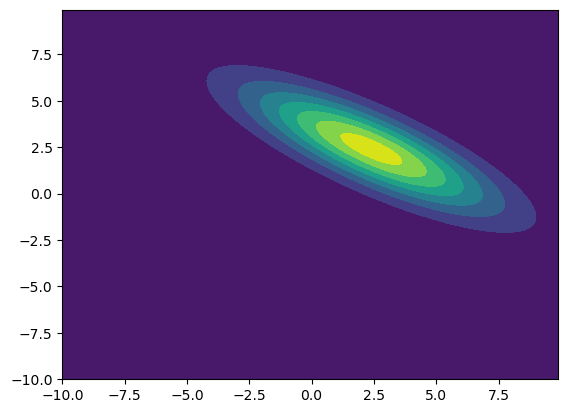

In [2]:
# https://stackoverflow.com/questions/63564845/contour-plots-for-multivariate-gaussian

#Part A: 
cov_mx = [[10.8, -6], [-6,5]]
X = stats.multivariate_normal(mean = [0,0], cov = cov_mx).rvs(size=10000)
X.shape
x, y = np.mgrid[-10:10:.1, -10:10:.1]
rv = stats.multivariate_normal([2.4, 2.4], cov_mx)
data = np.dstack((x, y))
z = rv.pdf(data)
plt.contourf(x, y, z, cmap='viridis')
plt.show()

#Part B:

For a 2x2 covariance matrix, the diagonal entries of a covariance matrix are the variances of the variables. As such, we have variances of 4 and 9. On the other hand, the off-diagonal entries of the covariance matrix are the covariances between the variables. Based on the Cauchy-Schwarz inequality, the absolute value of the covariance between two variables cannot exceed the square root variances product:

$$\sqrt{4 \cdot 9} = \sqrt{36} = 6$$

Thus, the theoretical maximum value of the off-diagonal entries can range from -6 to 6.

## Question 3 (3 marks)

For the mpg dataset:

(a) Do the newer cars have significantly better mean highway mileage than the older cars?

(b) Make a heatmap showing the correlations between all of the continuous and ordinal variables in the dataset.


To check if newer cars have significantly better mean highway mileage than the older cars, we must perform a hypothesis test.
Let $\mu_0$ be the newer cars mean highway mileage. Let $\mu_1$ be the older cars mean highway mileage. So,

$$H_0: \mu_0 = \mu_1$$
$$H_1: \mu_0 > \mu_1$$

In [3]:
#Part A:

mpg = pd.read_csv('mpg.csv')  # Read CSV file from local folder

old_cars = mpg[mpg['year'] == 1999]['hwy'].dropna()
new_cars = mpg[mpg['year'] == 2008]['hwy'].dropna()

stats.ttest_ind(new_cars, old_cars, equal_var=False, alternative = 'greater')

TtestResult(statistic=0.03286431672888292, pvalue=0.4869055446346965, df=231.6356899224998)

The obtained p-value is approx. 0.4869, which is less than 0.5, and the t-statistic is approx. 0.0329. The p-value is quite small, but not as small as we'd like at a 0.05 level. Thus we can reject $H_0$ theoretically, although there is not strong evidence to suggest that the mean highway mileage of newer cars is significantly better than that of older cars.

In [4]:
#Part B:

mpg_numeric = mpg[['displ', 'year', 'cyl', 'cty', 'hwy']].corr()

mpg_numeric_tidy = mpg_numeric.stack().reset_index().rename(columns={0: 'corr'})

alt.Chart(mpg_numeric_tidy).mark_rect().encode(
    x = alt.X('level_0').axis().title(''),  # no axis label ("title")
    y = alt.Y('level_1').axis().title(''),
    color = 'corr'
).properties(
    width=200,
    height=200
)

alt.Chart(...)

## Question 4 (3 marks)

(a) Among Gentoo penguins, is bill length significantly correlated with flipper length?

(b) Among male penguins, are there any significant differences in mean bill depth between different species?

In [5]:
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv" #Grabbing raw data from github csv file
penguin_df = pd.read_csv(url) #Converting csv -> pandas dataframe

#Part A: 

gentoo = penguin_df[penguin_df['species'] == "Gentoo"].dropna()
pg.corr(gentoo['bill_length_mm'], gentoo['flipper_length_mm'])

,n,r,CI95%,p-val,BF10,power
pearson,119,0.664205,"[0.55, 0.75]",1.803166e-16,3.962e+13,1.0


a) Using the pingouin package, we checked the correlation between bill length and flipper length for Gentoo penguins. The correlation outputted is 0.664205, and the p-value is approx. 1.8e-16, which is very small. Thus, there is strong evidence to suggest that there is a significant correlation between the two variables.

b) To check if there is any significant difference in mean depth between the three different species, we can use two methods. The first is using the stats.f_oneway, which is the one-way Analysis of Variance (ANOVA) that generalises t-tests to 3 or more categories. So,

    H0: the mean differences in bill depth between the 3 species are equal.
    H1: at least two means of the bill depth between the 3 species are unequal.

In [6]:
#Part B:
adelie_bill_depth = penguin_df.loc[(penguin_df['sex'] == 'MALE') & (penguin_df['species'] == 'Adelie'), 'bill_depth_mm'].dropna()
chinstrap_bill_depth = penguin_df.loc[(penguin_df['sex'] == 'MALE') & (penguin_df['species'] == 'Chinstrap'), 'bill_depth_mm'].dropna()
gentoo_bill_depth = penguin_df.loc[(penguin_df['sex'] == 'MALE') & (penguin_df['species'] == 'Gentoo'), 'bill_depth_mm'].dropna()


stats.f_oneway(adelie_bill_depth, chinstrap_bill_depth, gentoo_bill_depth)

F_onewayResult(statistic=294.6999029140085, pvalue=3.469732882810313e-55)

The p-value obtained is approx. 3.46e-55, which is incredibly small. Thus, we can conclude that there is strong evidence to suggest a significant differences in mean bill depth between different species for at least two species.

The second method is to perform individual t-tests between all pairs of the three species:

In [7]:
stat, p = stats.ttest_ind(adelie_bill_depth, chinstrap_bill_depth, equal_var=False)
print(f't-test result for Adelie vs. Chinstrap: {p}')
stat, p = stats.ttest_ind(adelie_bill_depth, gentoo_bill_depth, equal_var=False)
print(f't-test result for Adelie vs. Gentoo: {p}')
stat, p = stats.ttest_ind(chinstrap_bill_depth, gentoo_bill_depth, equal_var=False)
print(f't-test result for Chinstrap vs. Gentoo: {p}')


t-test result for Adelie vs. Chinstrap: 0.310705133969359
t-test result for Adelie vs. Gentoo: 1.2639997214033501e-45
t-test result for Chinstrap vs. Gentoo: 3.3365151432041e-32


All individual t-test results are very small, except the first one at a 0.05 level, Adelie vs. Chinstrap. We could say that for the specific case of Adelie and Chinstrap species, there is not a strong significant difference in mean bill depth.